In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

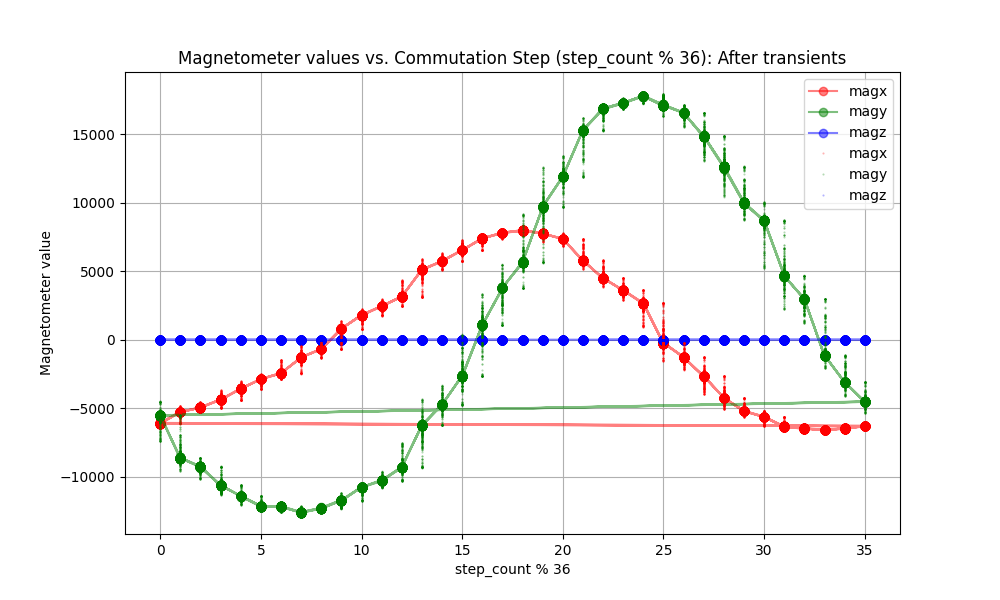

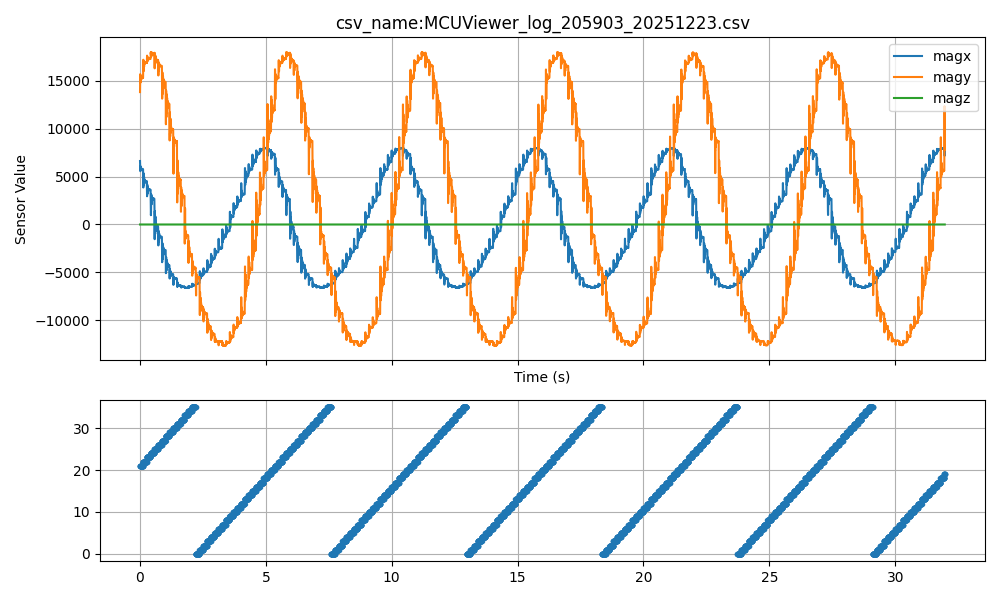

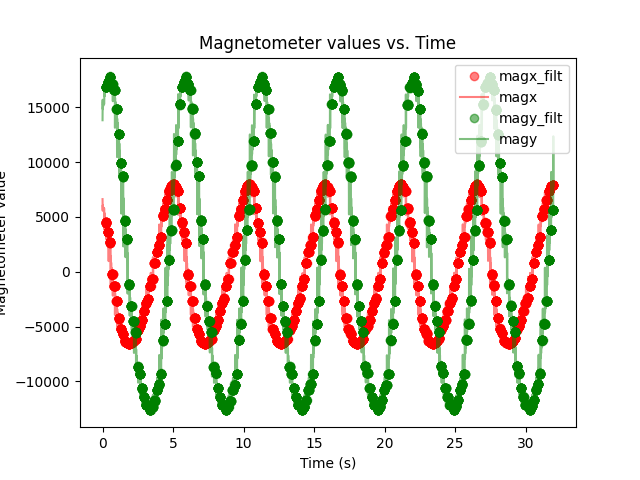

In [61]:
csv_name = "MCUViewer_log_205903_20251223.csv"
df = pd.read_csv(csv_name)
# Only keep rows after 1.5s
# df = df[df['time'] > 1.5].reset_index(drop=True)


fig, axs = plt.subplots(2, 1, figsize=(10,6), sharex=True, gridspec_kw={"height_ratios":[2,1]})
# Top plot: sensor values vs. time
axs[0].plot(df['time'], df['magx'], label='magx')
axs[0].plot(df['time'], df['magy'], label='magy')
axs[0].plot(df['time'], df['magz'], label='magz')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Sensor Value')
# axs[0].set_title('Magnetometer Axes vs Time')
axs[0].set_title(f"csv_name:{csv_name}")
axs[0].legend()
axs[0].grid(True)

# Bottom plot: sensor values vs. step_count % 36
step_mod36 = df['step_count'] % 36
axs[1].plot(df['time'], step_mod36, '.', alpha=0.5, label='magx')
axs[1].grid(True)
plt.tight_layout()


# Compute step_count modulo 6
df['step_mod6'] = df['step_count'] % 36

# Find the indices where step_count changes
step_changed = df['step_count'].diff() != 0

# For each step change, compute the minimum index after 0.1s (100 ms)
valid_indices = np.full(df.shape[0], False)

step_change_idxs = np.where(step_changed)[0]
if len(step_change_idxs) == 0 or step_change_idxs[0] != 0:
    # Ensure the very first sample is considered a change for logic
    step_change_idxs = np.insert(step_change_idxs, 0, 0)

for i in range(len(step_change_idxs)):
    idx_start = step_change_idxs[i]
    idx_end = step_change_idxs[i+1] if i+1 < len(step_change_idxs) else len(df)
    t_start = df.iloc[idx_start]['time']
    # Only include points at least 0.13s after the step change and before 0.145s
    times = df.iloc[idx_start:idx_end]['time']
    after_0p13s = times >= t_start + 0.12
    before_0p145s = times < t_start + 0.145
    after_0p1s = after_0p13s & before_0p145s
    # Set True for those indices
    valid_indices[idx_start:idx_end] = after_0p1s.values

# Filter the dataframe for valid samples
df_valid = df[valid_indices]

plt.figure()
plt.plot(df_valid['time'], df_valid['magx'], 'o', color='red', alpha=0.5, label='magx_filt')
plt.plot(df['time'], df['magx'], '-', color='red', alpha=0.5, label='magx')
plt.plot(df_valid['time'], df_valid['magy'], 'o', color='green', alpha=0.5, label='magy_filt')
plt.plot(df['time'], df['magy'], '-', color='green', alpha=0.5,label='magy')
plt.xlabel('Time (s)')
plt.ylabel('Magnetometer value')
plt.title('Magnetometer values vs. Time')
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(df_valid['step_mod6'], df_valid['magx'], 'o-', color='red', alpha=0.5, label='magx')
plt.plot(df_valid['step_mod6'], df_valid['magy'], 'o-', color='green', alpha=0.5, label='magy')
plt.plot(df_valid['step_mod6'], df_valid['magz'], 'o-', color='blue', alpha=0.5, label='magz')
plt.plot(df['step_mod6'], df['magx'], '.', color='red', alpha=0.3, markersize=1, label='magx')
plt.plot(df['step_mod6'], df['magy'], '.', color='green', alpha=0.3, markersize=1, label='magy')
plt.plot(df['step_mod6'], df['magz'], '.', color='blue', alpha=0.3, markersize=1, label='magz')
plt.xlabel('step_count % 36')
plt.ylabel('Magnetometer value')
plt.title('Magnetometer values vs. Commutation Step (step_count % 36): After transients')
plt.legend()
plt.grid(True)
plt.show()

df_valid[df_valid['time'] <= 99].to_csv(f"{csv_name[:-4]}_filt.csv", index=False)


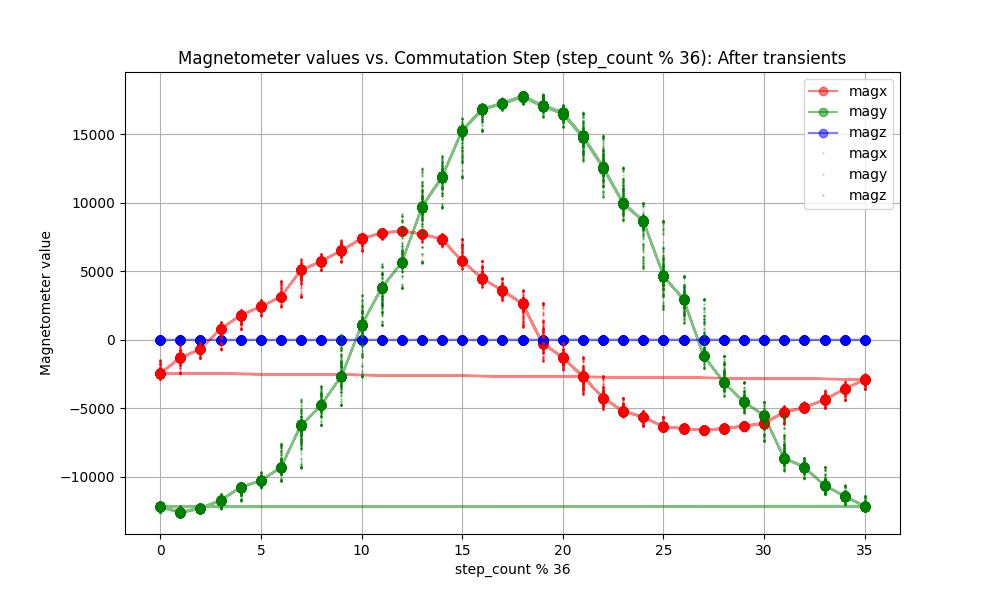

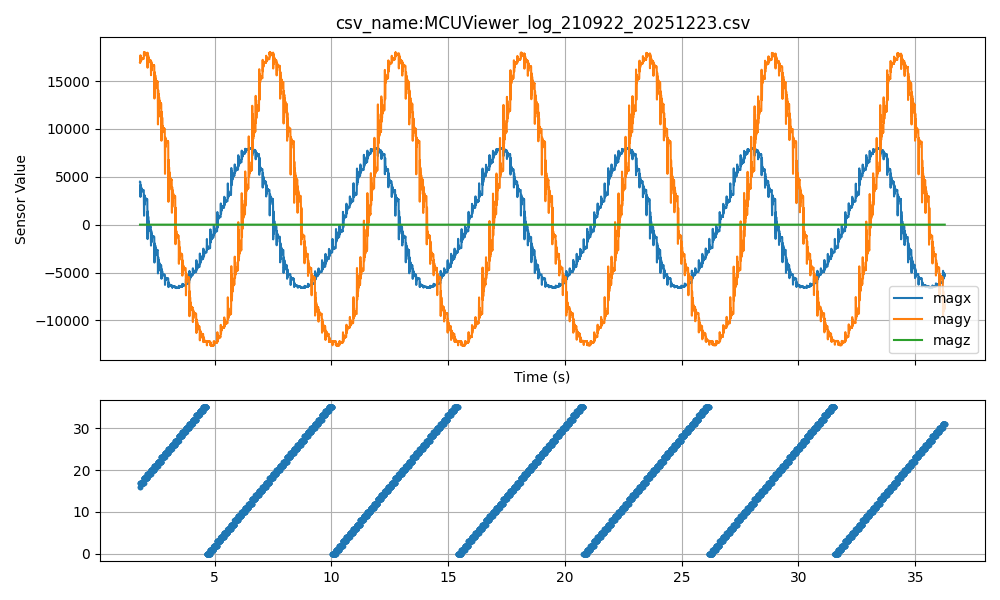

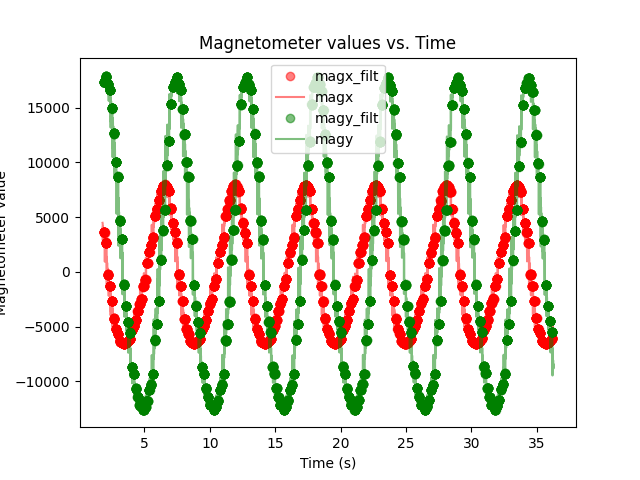

In [63]:
csv_name = "MCUViewer_log_210922_20251223.csv"
df = pd.read_csv(csv_name)
df = df[df['time'] > 1.8].reset_index(drop=True)


fig, axs = plt.subplots(2, 1, figsize=(10,6), sharex=True, gridspec_kw={"height_ratios":[2,1]})
# Top plot: sensor values vs. time
axs[0].plot(df['time'], df['magx'], label='magx')
axs[0].plot(df['time'], df['magy'], label='magy')
axs[0].plot(df['time'], df['magz'], label='magz')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Sensor Value')
# axs[0].set_title('Magnetometer Axes vs Time')
axs[0].set_title(f"csv_name:{csv_name}")
axs[0].legend()
axs[0].grid(True)

# Bottom plot: sensor values vs. step_count % 36
step_mod36 = df['step_count'] % 36
axs[1].plot(df['time'], step_mod36, '.', alpha=0.5, label='magx')
axs[1].grid(True)
plt.tight_layout()


# Compute step_count modulo 6
df['step_mod6'] = df['step_count'] % 36

# Find the indices where step_count changes
step_changed = df['step_count'].diff() != 0

# For each step change, compute the minimum index after 0.1s (100 ms)
valid_indices = np.full(df.shape[0], False)

step_change_idxs = np.where(step_changed)[0]
if len(step_change_idxs) == 0 or step_change_idxs[0] != 0:
    # Ensure the very first sample is considered a change for logic
    step_change_idxs = np.insert(step_change_idxs, 0, 0)

for i in range(len(step_change_idxs)):
    idx_start = step_change_idxs[i]
    idx_end = step_change_idxs[i+1] if i+1 < len(step_change_idxs) else len(df)
    t_start = df.iloc[idx_start]['time']
    # Only include points at least 0.13s after the step change and before 0.145s
    times = df.iloc[idx_start:idx_end]['time']
    after_0p13s = times >= t_start + 0.12
    before_0p145s = times < t_start + 0.145
    after_0p1s = after_0p13s & before_0p145s
    # Set True for those indices
    valid_indices[idx_start:idx_end] = after_0p1s.values

# Filter the dataframe for valid samples
df_valid = df[valid_indices]

plt.figure()
plt.plot(df_valid['time'], df_valid['magx'], 'o', color='red', alpha=0.5, label='magx_filt')
plt.plot(df['time'], df['magx'], '-', color='red', alpha=0.5, label='magx')
plt.plot(df_valid['time'], df_valid['magy'], 'o', color='green', alpha=0.5, label='magy_filt')
plt.plot(df['time'], df['magy'], '-', color='green', alpha=0.5,label='magy')
plt.xlabel('Time (s)')
plt.ylabel('Magnetometer value')
plt.title('Magnetometer values vs. Time')
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(df_valid['step_mod6'], df_valid['magx'], 'o-', color='red', alpha=0.5, label='magx')
plt.plot(df_valid['step_mod6'], df_valid['magy'], 'o-', color='green', alpha=0.5, label='magy')
plt.plot(df_valid['step_mod6'], df_valid['magz'], 'o-', color='blue', alpha=0.5, label='magz')
plt.plot(df['step_mod6'], df['magx'], '.', color='red', alpha=0.3, markersize=1, label='magx')
plt.plot(df['step_mod6'], df['magy'], '.', color='green', alpha=0.3, markersize=1, label='magy')
plt.plot(df['step_mod6'], df['magz'], '.', color='blue', alpha=0.3, markersize=1, label='magz')
plt.xlabel('step_count % 36')
plt.ylabel('Magnetometer value')
plt.title('Magnetometer values vs. Commutation Step (step_count % 36): After transients')
plt.legend()
plt.grid(True)
plt.show()

df_valid[df_valid['time'] <= 99].to_csv(f"{csv_name[:-4]}_filt.csv", index=False)


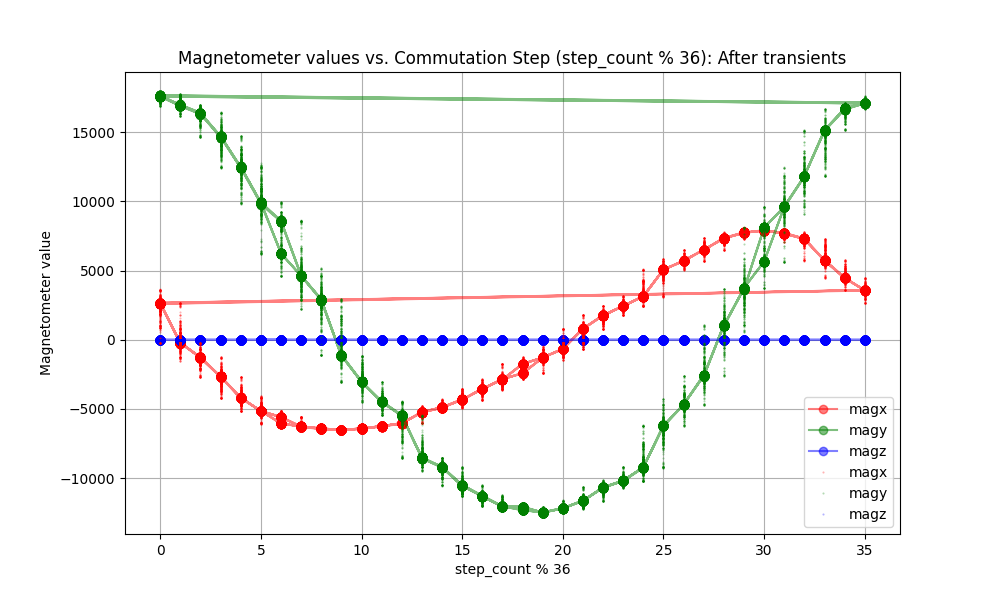

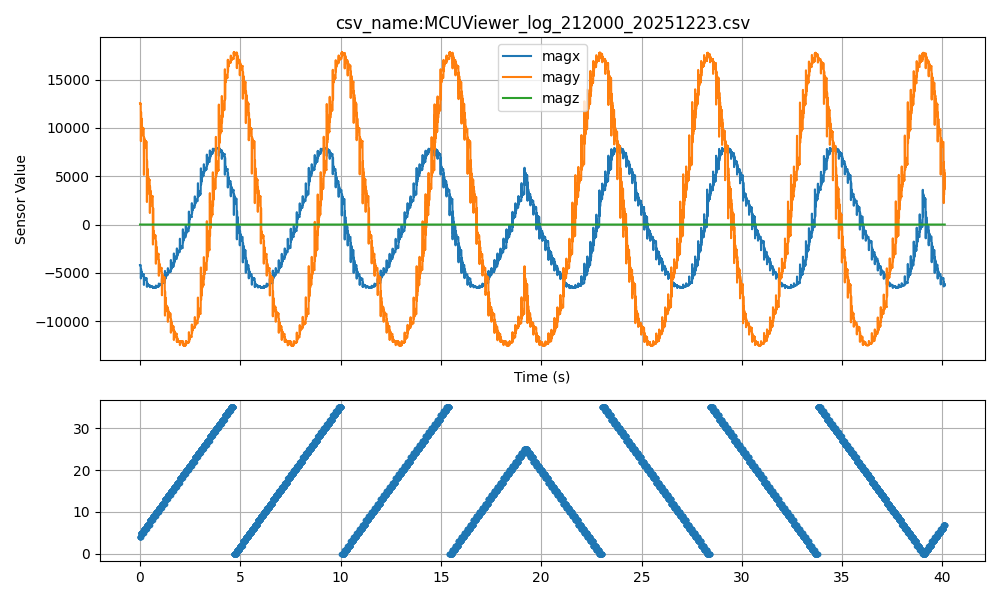

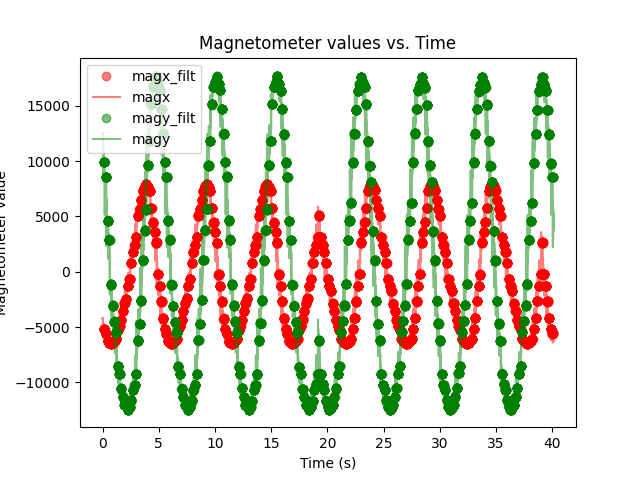

In [65]:
csv_name = "MCUViewer_log_212000_20251223.csv"
df = pd.read_csv(csv_name)
# df = df[df['time'] > 1.8].reset_index(drop=True)


fig, axs = plt.subplots(2, 1, figsize=(10,6), sharex=True, gridspec_kw={"height_ratios":[2,1]})
# Top plot: sensor values vs. time
axs[0].plot(df['time'], df['magx'], label='magx')
axs[0].plot(df['time'], df['magy'], label='magy')
axs[0].plot(df['time'], df['magz'], label='magz')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Sensor Value')
# axs[0].set_title('Magnetometer Axes vs Time')
axs[0].set_title(f"csv_name:{csv_name}")
axs[0].legend()
axs[0].grid(True)

# Bottom plot: sensor values vs. step_count % 36
step_mod36 = df['step_count'] % 36
axs[1].plot(df['time'], step_mod36, '.', alpha=0.5, label='magx')
axs[1].grid(True)
plt.tight_layout()


# Compute step_count modulo 6
df['step_mod6'] = df['step_count'] % 36

# Find the indices where step_count changes
step_changed = df['step_count'].diff() != 0

# For each step change, compute the minimum index after 0.1s (100 ms)
valid_indices = np.full(df.shape[0], False)

step_change_idxs = np.where(step_changed)[0]
if len(step_change_idxs) == 0 or step_change_idxs[0] != 0:
    # Ensure the very first sample is considered a change for logic
    step_change_idxs = np.insert(step_change_idxs, 0, 0)

for i in range(len(step_change_idxs)):
    idx_start = step_change_idxs[i]
    idx_end = step_change_idxs[i+1] if i+1 < len(step_change_idxs) else len(df)
    t_start = df.iloc[idx_start]['time']
    # Only include points at least 0.13s after the step change and before 0.145s
    times = df.iloc[idx_start:idx_end]['time']
    after_0p13s = times >= t_start + 0.12
    before_0p145s = times < t_start + 0.145
    after_0p1s = after_0p13s & before_0p145s
    # Set True for those indices
    valid_indices[idx_start:idx_end] = after_0p1s.values

# Filter the dataframe for valid samples
df_valid = df[valid_indices]

plt.figure()
plt.plot(df_valid['time'], df_valid['magx'], 'o', color='red', alpha=0.5, label='magx_filt')
plt.plot(df['time'], df['magx'], '-', color='red', alpha=0.5, label='magx')
plt.plot(df_valid['time'], df_valid['magy'], 'o', color='green', alpha=0.5, label='magy_filt')
plt.plot(df['time'], df['magy'], '-', color='green', alpha=0.5,label='magy')
plt.xlabel('Time (s)')
plt.ylabel('Magnetometer value')
plt.title('Magnetometer values vs. Time')
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(df_valid['step_mod6'], df_valid['magx'], 'o-', color='red', alpha=0.5, label='magx')
plt.plot(df_valid['step_mod6'], df_valid['magy'], 'o-', color='green', alpha=0.5, label='magy')
plt.plot(df_valid['step_mod6'], df_valid['magz'], 'o-', color='blue', alpha=0.5, label='magz')
plt.plot(df['step_mod6'], df['magx'], '.', color='red', alpha=0.3, markersize=1, label='magx')
plt.plot(df['step_mod6'], df['magy'], '.', color='green', alpha=0.3, markersize=1, label='magy')
plt.plot(df['step_mod6'], df['magz'], '.', color='blue', alpha=0.3, markersize=1, label='magz')
plt.xlabel('step_count % 36')
plt.ylabel('Magnetometer value')
plt.title('Magnetometer values vs. Commutation Step (step_count % 36): After transients')
plt.legend()
plt.grid(True)
plt.show()

df_valid[df_valid['time'] <= 99].to_csv(f"{csv_name[:-4]}_filt.csv", index=False)


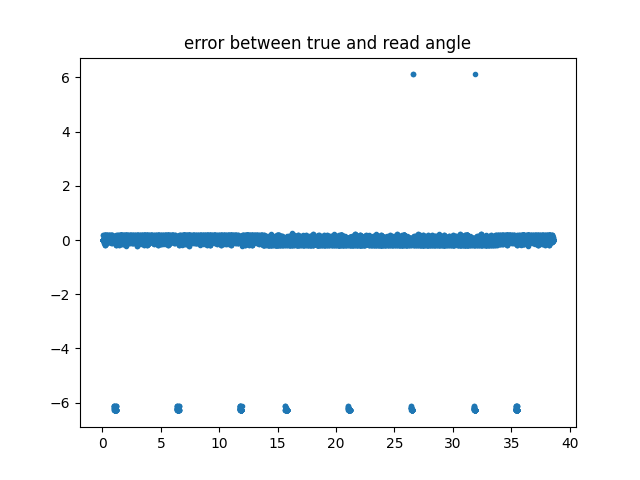

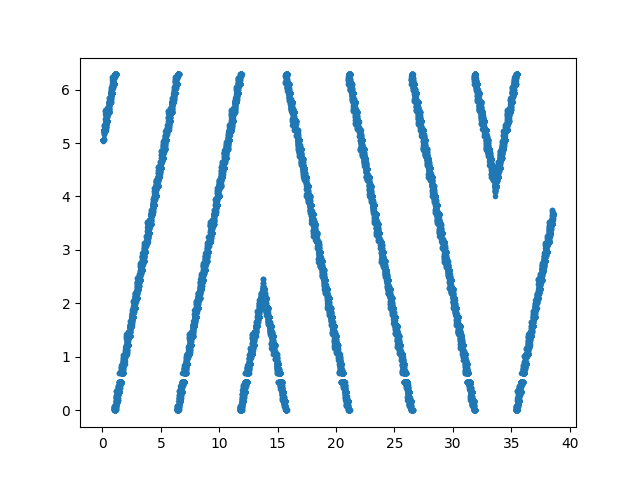

In [75]:
csv_name = "MCUViewer_log_214455_20251223.csv"
df = pd.read_csv(csv_name)

true_angle = ((df['step_count'].values / 36.0) * 2 * np.pi - 2*2*np.pi/6.0) % (2 * np.pi) 

read_angle = df['magangle'].values * np.pi/180.0


plt.figure()
plt.plot(df['time'], read_angle, '.')

plt.figure()
plt.plot(df['time'], true_angle-read_angle, '.')
plt.title("error between true and read angle")
plt.show()


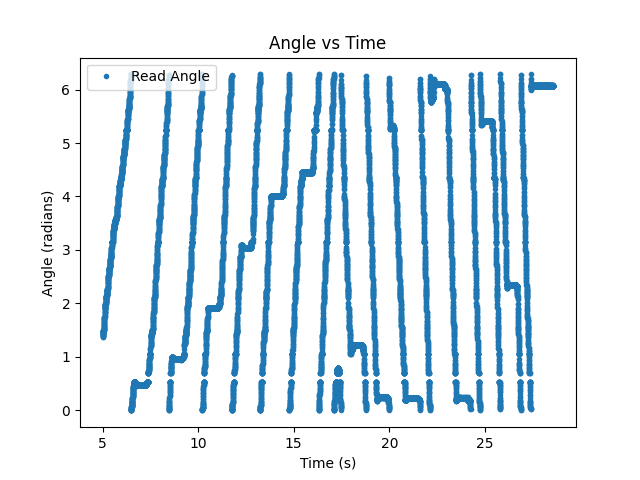

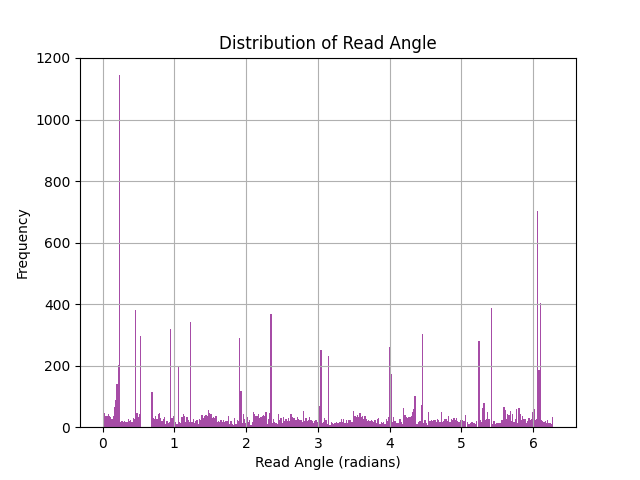

In [80]:
csv_name = "MCUViewer_log_220028_20251223.csv"
df = pd.read_csv(csv_name)
# Only keep (filter) data after 5 seconds
df = df[df['time'] > 5].reset_index(drop=True)


read_angle = df['magangle'].values * np.pi / 180.0

plt.figure()
plt.plot(df['time'], read_angle, '.', label='Read Angle')
plt.xlabel('Time (s)')
plt.ylabel('Angle (radians)')
plt.title('Angle vs Time')
plt.legend()
plt.show()
plt.figure()
plt.hist(read_angle, bins=360, color='purple', alpha=0.7)
plt.xlabel('Read Angle (radians)')
plt.ylabel('Frequency')
plt.title('Distribution of Read Angle')
plt.grid(True)
plt.show()
